**ENERGY EFFICIENCY**:

**Problem Statement:**

The effect of eight input variables (relative compactness, surface area, wall area, roof
area, overall height, orientation, glazing area, glazing area distribution) on two output
variables, namely heating load (HL) and cooling load (CL), of residential buildings is
investigated using a statistical machine learning framework. We have to use a number
of classical and non-parametric statistical analytic tools to carefully analyze the
strength of each input variable's correlation with each of the output variables in order
to discover the most strongly associated input variables. We need to estimate HL and
CL, we can compare a traditional linear regression approach to a sophisticated
state-of-the-art nonlinear non-parametric method, random forests.

**Importing necesarry packages and data:**

In [1]:
# Import packages and modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

In [2]:
#Importing dataset

from google.colab import files 
files.upload()

Saving Energy_Eifficency.csv to Energy_Eifficency.csv


{'Energy_Eifficency.csv': b'X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2\r\n0.98,514.50,294.00,110.25,7.00,2,0.00,0,15.55,21.33\r\n0.98,514.50,294.00,110.25,7.00,3,0.00,0,15.55,21.33\r\n0.98,514.50,294.00,110.25,7.00,4,0.00,0,15.55,21.33\r\n0.98,514.50,294.00,110.25,7.00,5,0.00,0,15.55,21.33\r\n0.90,563.50,318.50,122.50,7.00,2,0.00,0,20.84,28.28\r\n0.90,563.50,318.50,122.50,7.00,3,0.00,0,21.46,25.38\r\n0.90,563.50,318.50,122.50,7.00,4,0.00,0,20.71,25.16\r\n0.90,563.50,318.50,122.50,7.00,5,0.00,0,19.68,29.60\r\n0.86,588.00,294.00,147.00,7.00,2,0.00,0,19.50,27.30\r\n0.86,588.00,294.00,147.00,7.00,3,0.00,0,19.95,21.97\r\n0.86,588.00,294.00,147.00,7.00,4,0.00,0,19.34,23.49\r\n0.86,588.00,294.00,147.00,7.00,5,0.00,0,18.31,27.87\r\n0.82,612.50,318.50,147.00,7.00,2,0.00,0,17.05,23.77\r\n0.82,612.50,318.50,147.00,7.00,3,0.00,0,17.41,21.46\r\n0.82,612.50,318.50,147.00,7.00,4,0.00,0,16.95,21.16\r\n0.82,612.50,318.50,147.00,7.00,5,0.00,0,15.98,24.93\r\n0.79,637.00,343.00,147.00,7.00,2,0.00,0,28.52,37.73\r\n0.79

In [3]:
# Read file into dataframe and examining the first 5 rows.

df=pd.read_csv('/content/Energy_Eifficency.csv')
df.head()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0,15.55,21.33
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0,15.55,21.33
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0,15.55,21.33
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0,15.55,21.33
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0,20.84,28.28


**Description of columns from dataset documentation:**

The dataset contains eight attributes (or features, denoted by X1...X8) and two responses (or
outcomes, denoted by y1 and y2). The aim is to use the eight features to predict each of the two
responses.
Specifically:
X1 Relative Compactness
X2 Surface Area
X3 Wall Area
X4 Roof Area
X5 Overall Height
X6 Orientation
X7 Glazing Area
X8 Glazing Area Distribution
y1 Heating Load - Target
y2 Cooling Load - Target



In [4]:
#Shape of the DataFrame
df.shape

(768, 10)

In [5]:
#Determing the Summary of dataset.
df.describe()

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
count,768.000000,768.000000,768.000000,768.000000,768.00000,768.000000,768.000000,768.00000,768.000000,768.000000
mean,0.764167,671.708333,318.500000,176.604167,5.25000,3.500000,0.234375,2.81250,22.307201,24.587760
std,0.105777,88.086116,43.626481,45.165950,1.75114,1.118763,0.133221,1.55096,10.090196,9.513306
min,0.620000,514.500000,245.000000,110.250000,3.50000,2.000000,0.000000,0.00000,6.010000,10.900000
25%,0.682500,606.375000,294.000000,140.875000,3.50000,2.750000,0.100000,1.75000,12.992500,15.620000
50%,0.750000,673.750000,318.500000,183.750000,5.25000,3.500000,0.250000,3.00000,18.950000,22.080000
75%,0.830000,741.125000,343.000000,220.500000,7.00000,4.250000,0.400000,4.00000,31.667500,33.132500
max,0.980000,808.500000,416.500000,220.500000,7.00000,5.000000,0.400000,5.00000,43.100000,48.030000


In [6]:
#determing the datatype of each column.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 60.1 KB


**Data Cleanning:**

In [7]:
#Checking for missing values
df.isna().sum()

X1    0
X2    0
X3    0
X4    0
X5    0
X6    0
X7    0
X8    0
Y1    0
Y2    0
dtype: int64

**Observation:** There is no missing values in any columns.

In [8]:
# Dropping duplictaes if any in the data

df=df.drop_duplicates()
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 768 entries, 0 to 767
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   X1      768 non-null    float64
 1   X2      768 non-null    float64
 2   X3      768 non-null    float64
 3   X4      768 non-null    float64
 4   X5      768 non-null    float64
 5   X6      768 non-null    int64  
 6   X7      768 non-null    float64
 7   X8      768 non-null    int64  
 8   Y1      768 non-null    float64
 9   Y2      768 non-null    float64
dtypes: float64(8), int64(2)
memory usage: 66.0 KB


There is no duplicates present in the dataset.

In [9]:
# Understanding the data by printing out all column names
df.columns
#columns = ['relative_compactness','surface_area','wall_area','roof_area','overall_height','orientation','glazing_area','glazing_area_distribution','heating_load','cooling_load']

Index(['X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'Y1', 'Y2'], dtype='object')

**EDA(Expolatory Data Analysis):**

**Statictics of Features:**

In [10]:
#Determing the Statictics of each variable.

for i in df.columns:
    print("Statistics for feature : {0}".format(i))
    print(df[i].describe())
    print("----------------------------------------")

Statistics for feature : X1
count    768.000000
mean       0.764167
std        0.105777
min        0.620000
25%        0.682500
50%        0.750000
75%        0.830000
max        0.980000
Name: X1, dtype: float64
----------------------------------------
Statistics for feature : X2
count    768.000000
mean     671.708333
std       88.086116
min      514.500000
25%      606.375000
50%      673.750000
75%      741.125000
max      808.500000
Name: X2, dtype: float64
----------------------------------------
Statistics for feature : X3
count    768.000000
mean     318.500000
std       43.626481
min      245.000000
25%      294.000000
50%      318.500000
75%      343.000000
max      416.500000
Name: X3, dtype: float64
----------------------------------------
Statistics for feature : X4
count    768.000000
mean     176.604167
std       45.165950
min      110.250000
25%      140.875000
50%      183.750000
75%      220.500000
max      220.500000
Name: X4, dtype: float64
-------------------------

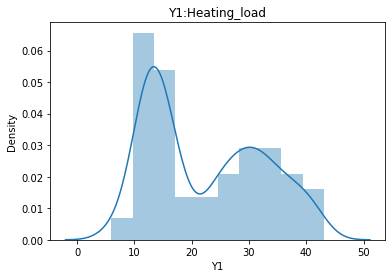

In [11]:
#Distribution plot of Heating load

plt.title('Y1:Heating_load')
sns.distplot(df['Y1'],hist=True)
plt.show()

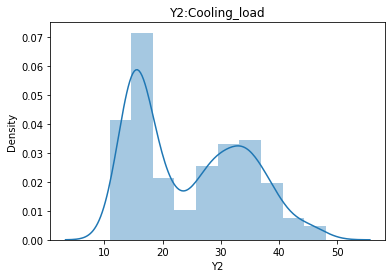

In [12]:
# Distribution plot of Cooling load

plt.title('Y2:Cooling_load')
sns.distplot(df['Y2'],hist=True)
plt.show()

**Observation:** Both in Heating load(Y1) and Cooling load(Y2), the data distribution is skewed towards rightside. 

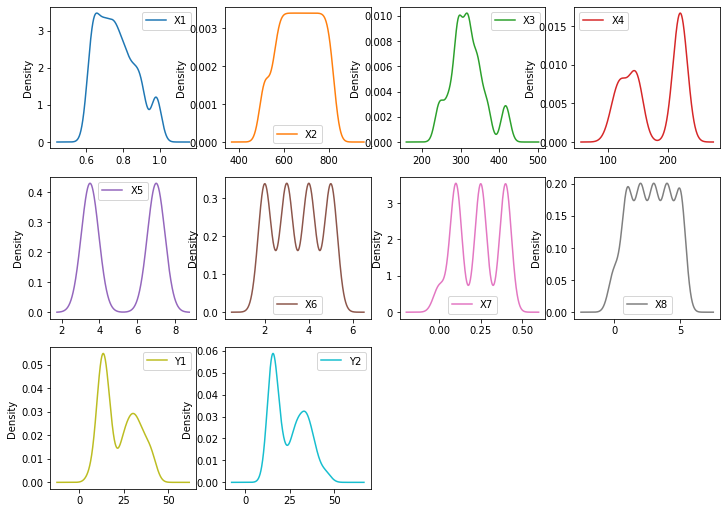

In [13]:
#densityPlot

df.plot(kind = 'density', subplots= True, layout = (4,4), sharex =False, figsize = (12, 12));

**Observation:** The distribution of all features are approximately normal, with some skewness. 

**Checking for Outliers if any:**

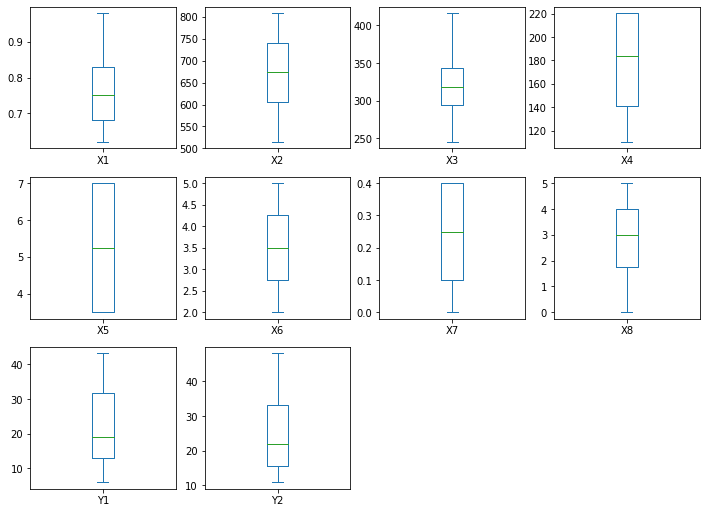

In [14]:
#boxplot

df.plot(kind = 'box', subplots = True, layout = (4, 4), sharex = False, sharey = False, figsize = (12, 12));

**Observations:** No outliers are present in all the features both target and independent features.

In [15]:
# separting independent features(continuous) to compare with the targets

continuous_feature=df.drop(columns=['Y1','Y2'])
continuous_feature

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


**Scatter plot between the continous features and the target Heating Load(Y1):**

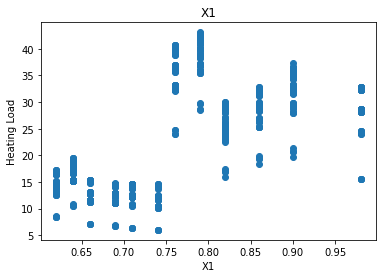

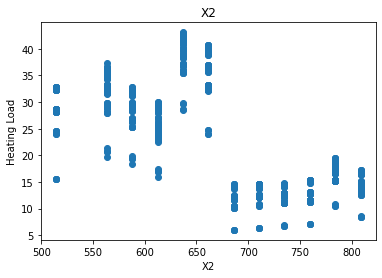

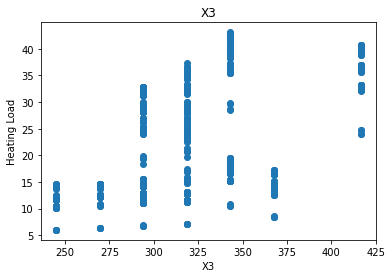

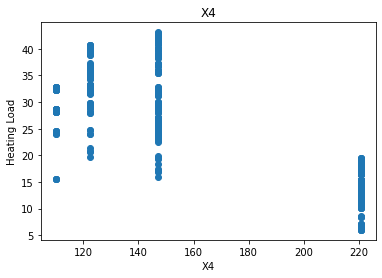

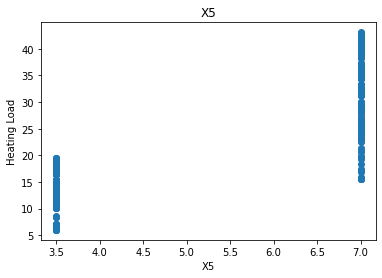

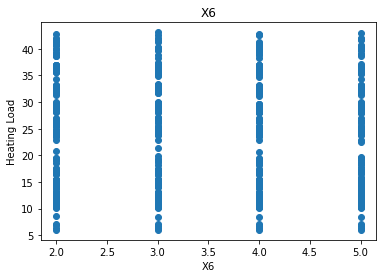

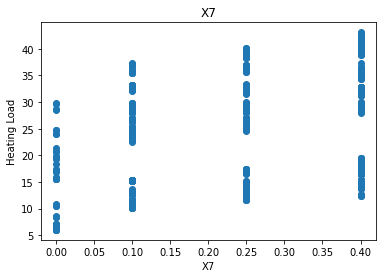

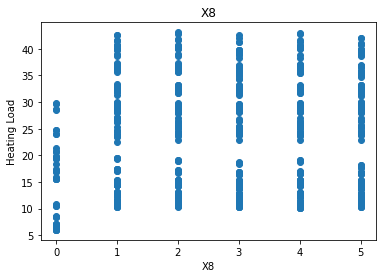

In [16]:
for feature in continuous_feature:
        plt.scatter(df[feature],df['Y1'])
        plt.xlabel(feature)
        plt.ylabel('Heating Load')
        plt.title(feature)
        plt.show()

**Scatter plot between the continous features and the target Cooling Load(Y2):**



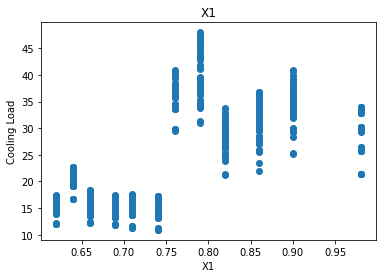

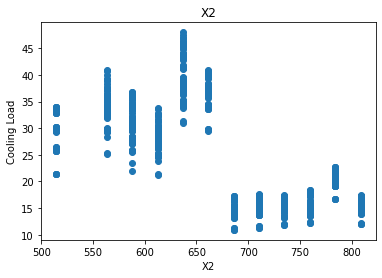

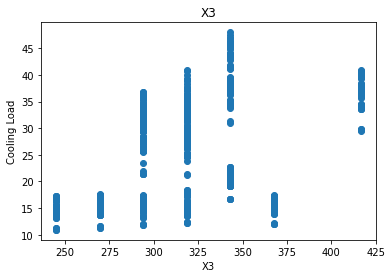

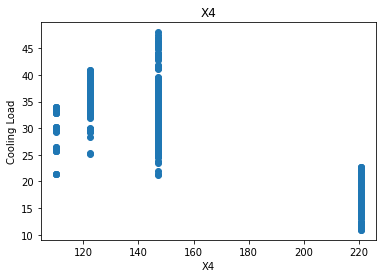

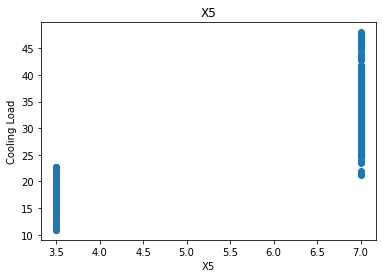

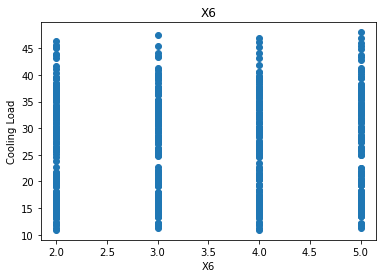

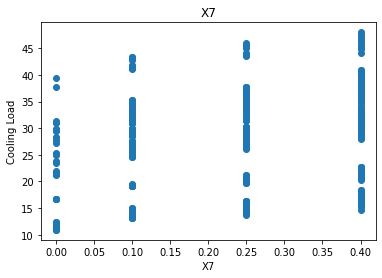

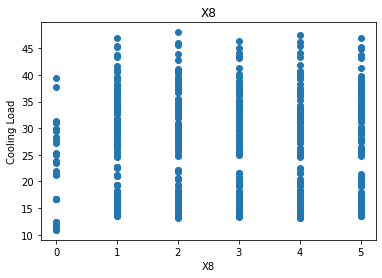

In [17]:
for feature in continuous_feature:
        plt.scatter(df[feature],df['Y2'])
        plt.xlabel(feature)
        plt.ylabel('Cooling Load')
        plt.title(feature)
        plt.show()

**Correlation between the variables:**

In [18]:
# corrlation matrix 

corr_matrix=df.corr()
corr_matrix

,X1,X2,X3,X4,X5,X6,X7,X8,Y1,Y2
X1,1.000000e+00,-9.919015e-01,-2.037817e-01,-8.688234e-01,8.277473e-01,4.678592e-17,-2.960552e-15,-7.107006e-16,0.622272,0.634339
X2,-9.919015e-01,1.000000e+00,1.955016e-01,8.807195e-01,-8.581477e-01,-3.459372e-17,3.636925e-15,2.438409e-15,-0.658120,-0.672999
X3,-2.037817e-01,1.955016e-01,1.000000e+00,-2.923165e-01,2.809757e-01,-2.429499e-17,-8.567455e-17,2.067384e-16,0.455671,0.427117
X4,-8.688234e-01,8.807195e-01,-2.923165e-01,1.000000e+00,-9.725122e-01,-5.830058e-17,-1.759011e-15,-1.078071e-15,-0.861828,-0.862547
X5,8.277473e-01,-8.581477e-01,2.809757e-01,-9.725122e-01,1.000000e+00,4.492205e-17,1.489134e-17,-2.920613e-17,0.889431,0.895785
X6,4.678592e-17,-3.459372e-17,-2.429499e-17,-5.830058e-17,4.492205e-17,1.000000e+00,-9.406007e-16,-2.549352e-16,-0.002587,0.014290
X7,-2.960552e-15,3.636925e-15,-8.567455e-17,-1.759011e-15,1.489134e-17,-9.406007e-16,1.000000e+00,2.129642e-01,0.269841,0.207505
X8,-7.107006e-16,2.438409e-15,2.067384e-16,-1.078071e-15,-2.920613e-17,-2.549352e-16,2.129642e-01,1.000000e+00,0.087368,0.050525
Y1,6.222722e-01,-6.581202e-01,4.556712e-01,-8.618283e-01,8.894307e-01,-2.586534e-03,2.698410e-01,8.736759e-02,1.000000,0.975862
Y2,6.343391e-01,-6.729989e-01,4.271170e-01,-8.625466e-01,8.957852e-01,1.428960e-02,2.075050e-01,5.052512e-02,0.975862,1.000000


**Plotting the correlation between variables:**

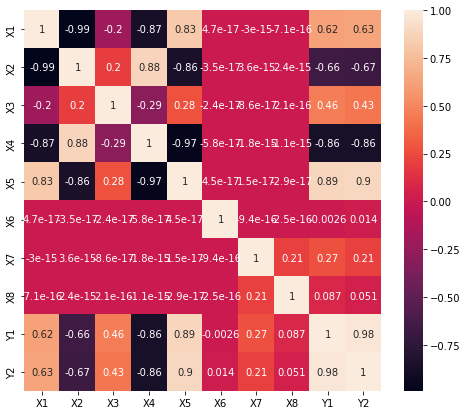

In [19]:
f,ax = plt.subplots(figsize=(8, 7))
sns.heatmap(data=corr_matrix, annot=True,ax=ax)

**Observation:** The Correlations of features X4,X5,X1,X2 are more with targets(Y1 and Y2) are more compare to other features correlation.

No handles with labels found to put in legend.


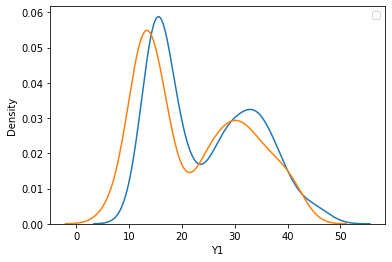

In [20]:
# correlation between targets(Y1 and Y2)
sns.distplot(df['Y2'],hist=False)
sns.distplot(df['Y1'],hist=False)
plt.legend()
plt.show()

**Observation:** Heating load(Y1) and Cooling load(Y2) are highly correlated

**Defining the Independent and Dependent variables:**

In [21]:
# Dependent variable(targets(Y1 and Y2))

y1=df['Y1']
y2=df['Y2']

In [22]:
# Independent variables(X1,X2,X3,....X8)

x=df.drop(columns=['Y1','Y2'])
x

,X1,X2,X3,X4,X5,X6,X7,X8
0,0.98,514.5,294.0,110.25,7.0,2,0.0,0
1,0.98,514.5,294.0,110.25,7.0,3,0.0,0
2,0.98,514.5,294.0,110.25,7.0,4,0.0,0
3,0.98,514.5,294.0,110.25,7.0,5,0.0,0
4,0.90,563.5,318.5,122.50,7.0,2,0.0,0
...,...,...,...,...,...,...,...,...
763,0.64,784.0,343.0,220.50,3.5,5,0.4,5
764,0.62,808.5,367.5,220.50,3.5,2,0.4,5
765,0.62,808.5,367.5,220.50,3.5,3,0.4,5
766,0.62,808.5,367.5,220.50,3.5,4,0.4,5


**MODELING Part:**

**a. Modeling for Heating Load:**

**Splitting the data:**

In [23]:
#Split the data

from sklearn.model_selection import train_test_split
X_train, X_test, Y_train, Y_test = train_test_split(x, y1, test_size =0.20,random_state = 0)
print("xtrain shape : ", X_train.shape)
print("xtest shape : ", X_test.shape)
print("ytrain shape : ", Y_train.shape)
print("ytest shape : ", Y_test.shape)

xtrain shape :  (614, 8)
xtest shape :  (154, 8)
ytrain shape :  (614,)
ytest shape :  (154,)


**Standardize the data:**

In [24]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)

**Linear Regression:**

In [25]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)

# fit the data
regressor.fit(X_train,Y_train)

#predict the target
Y_pred1 = regressor.predict(X_test)

In [26]:
coefficients_linear = pd.DataFrame(regressor.coef_,x.columns)
coefficients_linear.columns = ['coefficients_linear']
coefficients_linear

,coefficients_linear
X1,-6.063975
X2,-3.422312
X3,0.893841
X4,-3.772775
X5,7.091438
X6,-0.023143
X7,2.632027
X8,0.246351


**Observation:** Based on the coefficient values of variables, the feature(Overall Height) 'X5' is most important feature to predict the targets.

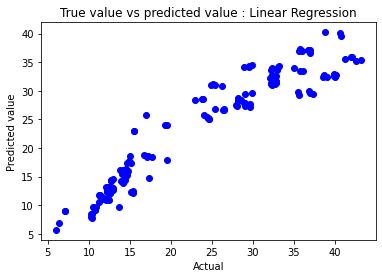

In [27]:
# compare the predict value with the actual value ith scatter plot

plt.scatter(Y_test, Y_pred1, c = 'blue')
plt.xlabel("Actual")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

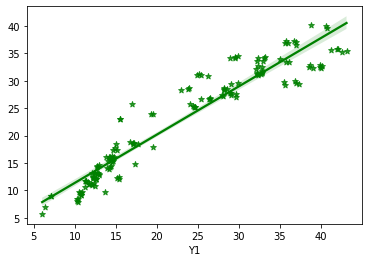

In [28]:
sns.regplot(x=Y_test,y=Y_pred1,marker='*',color='green')

**Obseravtion:** from the above plot, the relationship between predict value and the actual is almost linear.

In [29]:
# Model performance

from sklearn import metrics
r2_score_lr=metrics.r2_score(Y_test,Y_pred1)
print('R2- SCORE_lr:', metrics.r2_score(Y_test,Y_pred1))

R2- SCORE_lr: 0.9085551235120666


**Random Forest Regressor:**

In [30]:
# Importing the necessary packages and fit the model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
rfr = RandomForestRegressor(n_estimators = 100, random_state = 0)

# model performance
scores_rfr = cross_val_score(rfr, x, y1, cv=5)
print(np.mean(scores_rfr))

0.9650184564385802


**Decision Tree Regressor:**

In [31]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y1)

In [32]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_train = scaler.fit_transform(x_train) 
x_test = scaler.transform(x_test)

In [33]:
from sklearn import tree 
clf = tree.DecisionTreeRegressor(max_depth = 6)
clf = clf.fit(x_train, y_train)


In [34]:
pred_test = clf.predict(x_test)
mse = np.mean((y_test - pred_test)**2) 
print("RMSE on the test data")
print(np.sqrt(mse))

RMSE on the test data
0.5946770131139663


In [35]:
pred_train = clf.predict(x_train)
mse = np.mean((y_train - pred_train)**2) 
print("RMSE on the train data")
print(np.sqrt(mse))

RMSE on the train data
0.4612097090775893


In [36]:
train_plot = []
test_plot = []
for i in range(3,10):
    clf = tree.DecisionTreeRegressor(max_depth = i)
    clf = clf.fit(x_train, y_train)
    pred_test = clf.predict(x_test)
    test_plot.append(np.mean((y_test - pred_test)**2)) 
    pred_train = clf.predict(x_train)
    train_plot.append(np.mean((y_train - pred_train)**2)) 

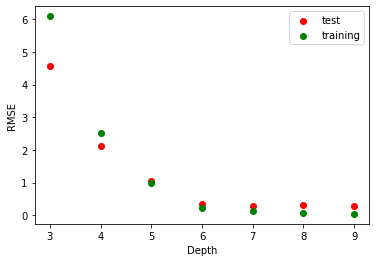

In [37]:
plt.figure()
plt.scatter(np.linspace(3,9, 7), test_plot, c = 'red', label = 'test')
plt.scatter(np.linspace(3,9, 7), train_plot, c = 'green', label = 'training')
plt.xlabel('Depth')
plt.ylabel('RMSE')
plt.legend()
plt.show()

**Observation:** By fitting the decision tree regressor model on both train and test data, the model RMSE values are close to each other and less.
The RMSE value converges to zero as the depth increases.


In [38]:
#model performance

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
scores_dtr = cross_val_score(dtr, x, y1, cv=5)
print(np.mean(scores_dtr))

0.9642546301033654


Observation: In case of predicting the Heating load(Y1) target,Random forest regressor model is best fitted, with high r2_score value of 0.965 compare to other two models.

**b. Modeling for Cooling Load:**

**Splitting the data:**

In [39]:
#Split the data

from sklearn.model_selection import train_test_split
X1_train, X1_test, Y1_train, Y1_test = train_test_split(x, y2, test_size =0.20,random_state = 0)
print("x1train shape : ", X1_train.shape)
print("x1test shape : ", X1_test.shape)
print("y1train shape : ", Y1_train.shape)
print("y1test shape : ", Y1_test.shape)

x1train shape :  (614, 8)
x1test shape :  (154, 8)
y1train shape :  (614,)
y1test shape :  (154,)


**Standardize the data:**

In [40]:
#Scaling the data

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X1_train = scaler.fit_transform(X1_train) 
X1_test = scaler.transform(X1_test)

**Linear Regression:**

In [41]:
from sklearn.linear_model import LinearRegression
regressor = LinearRegression(fit_intercept=True)

# fit the data
regressor.fit(X1_train,Y1_train)

#predict the target
Y1_pred1 = regressor.predict(X1_test)

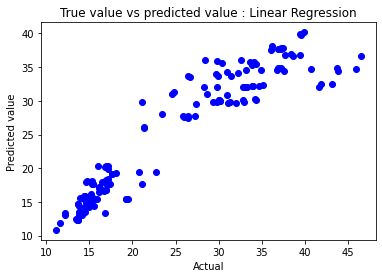

In [42]:
# compare the predict value with the actual value with scatter plot

plt.scatter(Y1_test, Y1_pred1, c = 'blue')
plt.xlabel("Actual")
plt.ylabel("Predicted value")
plt.title("True value vs predicted value : Linear Regression")
plt.show()

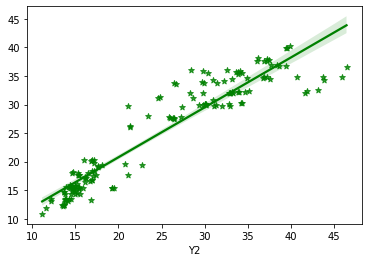

In [43]:
sns.regplot(x=Y1_test,y=Y1_pred1,marker='*',color='green')

**Obseravtion:** from the above plot, the relationship between predict value and the actual is almost linear, in case of Cooling load(Y2) prediction also.

In [44]:
# Model performance

from sklearn import metrics
r2_score_lr1=metrics.r2_score(Y1_test,Y1_pred1)

print('R2- SCORE1:', metrics.r2_score(Y1_test,Y1_pred1))

R2- SCORE1: 0.8862270316975983


**Random Forest Regressor:**

In [45]:
# Importing the necessary packages and fit the model

from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_val_score
rfr1 = RandomForestRegressor(n_estimators = 100, random_state = 0)

# model performance
scores_rfr1 = cross_val_score(rfr1, x, y2, cv=5)
print(np.mean(scores_rfr1))

0.9581218262351653


**Decision Tree:**

In [46]:
#model performance

from sklearn.tree import DecisionTreeRegressor
dtr = DecisionTreeRegressor()
scores_dtr1 = cross_val_score(dtr, x, y1, cv=5)
print(np.mean(scores_dtr1))

0.964252559451856


**Observation:** In case of predicting the cooling load(Y2) target, decision tree regressor model is best fitted, with high r2_score value of 0.96 compare to other two models. 

**Tableating the Scores of Model:**

In [47]:
#Model score values for heating load prediction

data_lr={'MODEL':['Linear Regressor','RandomForestRegressor','Decision Tree'],'Target(Y1)':['Heating Load', 'Heating Load','Heating Load'],
        'R2_Score':[r2_score_lr,np.mean(scores_rfr),np.mean(scores_dtr)]}
df_lr = pd.DataFrame(data_lr)
df_lr

,MODEL,Target(Y1),R2_Score
0,Linear Regressor,Heating Load,0.908555
1,RandomForestRegressor,Heating Load,0.965018
2,Decision Tree,Heating Load,0.964255


**Observation:**

R2_score(0.96) of Random forest model much high and better than other regressor.


In [48]:
#Model score values for cooling load prediction

data_lr1={'MODEL':['Linear Regressor','RandomForestRegressor','Decision Tree'],'Target(Y2)':['Cooling Load', 'Cooling Load','Cooling Load'],
        'R2_Score':[r2_score_lr1,np.mean(scores_rfr1),np.mean(scores_dtr1)]}
df_lr1 = pd.DataFrame(data_lr1)
df_lr1

,MODEL,Target(Y2),R2_Score
0,Linear Regressor,Cooling Load,0.886227
1,RandomForestRegressor,Cooling Load,0.958122
2,Decision Tree,Cooling Load,0.964253


**Observation:**

1.R2_score(0.96) of Decision Tree Regressor model much high and better than other regressor.
2. for predicting the targets both Heating and Cooling loads, the models random forest regressor and decision tree regressor is best suitable models.

**Feature importance:**

**Important features in predicting the Heating Load(Y1):**

Feature: 0, Score: 0.09635
Feature: 1, Score: 0.34692
Feature: 2, Score: 0.02841
Feature: 3, Score: 0.32670
Feature: 4, Score: 0.11122
Feature: 5, Score: 0.00075
Feature: 6, Score: 0.07598
Feature: 7, Score: 0.01368


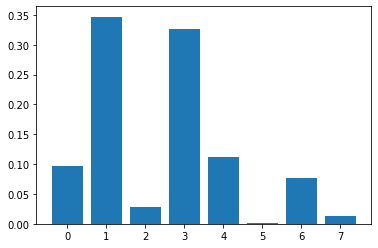

In [49]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(x, y1)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**Observation:** From the above plot and the feature important score values, the features **surface area(X2) and Roof Area(X4) are most important to predict the target **Heating Load(Y1)**

**Important features in predicting the Cooling Load(Y2):**

Feature: 0, Score: 0.53169
Feature: 1, Score: 0.13817
Feature: 2, Score: 0.04096
Feature: 3, Score: 0.05143
Feature: 4, Score: 0.16096
Feature: 5, Score: 0.01288
Feature: 6, Score: 0.04728
Feature: 7, Score: 0.01662


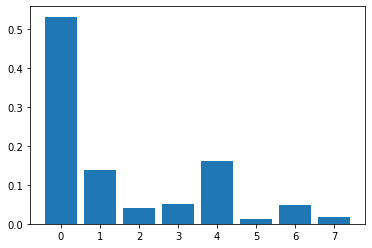

In [50]:
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(x, y2)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
plt.bar([x for x in range(len(importance))], importance)
plt.show()

**Observation:** From the above plot and the feature important score values, the features **Relative Compactness(X1)** and **Overall Height(X5)** are most important to predict the target **Cooling Load(Y2)**

**Conclusion:**
1. Among the above three models Random Forest Regressor, gives best and high r2_score value(0.96) in predicting the targets comparatively.
2. The features Relative Compactness(X1),Surface area(X2),Roof Area(X4) and Overall Height(X5) are most important to predict the targets Heating load(Y1) and Coolind Load(Y2) among other features.